# The parameters of pyqz

This page is also available as an IPython notebook (``pyqz_demo_param.ipynb``) included with the code and located in ``pyqz/examples/``.

pyqz is designed to be easy and quick to use, but without withholding any information from the user. As such, all parameters of importance for deriving the estimates of ``LogQ`` and ``Tot[O]+12`` can be modified via dedicated keywords. Here, we present some basic examples to clarify what does what. In addition to these examples, the documentation also contains a detailed list of the functions of pyqz, along with a brief description of each keyword.

First things first, let's import pyqz and the Image module to display the figures.

In [1]:
%matplotlib inline
import pyqz
import pyqz_plots

import numpy as np

### Parameter 1: ``srs``

``srs`` defines the **size of the random sample** of line fluxes generated by pyqz. This is an essential keyword to the propagation of observational errors associated with each line flux measurements. In other words, ``srs`` is the number of discrete estimates of the probability density function (in the {``LogQ`` vs. ``Tot[O]+12``} plane) associated with one diagnostic grid. 

Hence, the joint probability function density function (combining $n$ diagnostic grids) will be reconstructed via a Kernel Density Estimation routine from $n\cdot$``srs`` points. ``srs=400`` is the default value, suitable for error levels of $\sim$5%. We suggest ``srs=800`` for errors at the 10%-15% level. Basically, larger errors result in wider probability density peaks, and thus require more ``srs`` points to be properly discretized - at the cost of additional computation time of course ! Try changing the value of ``my_srs`` in the example below, and watch the number of black dots vary accordingly in the KDE diagram.

 
--> Received 1 spectrum ...
--> Dealing with them one at a time ... be patient now !
    (no status update until I am done ...)
 
All done in 0:00:00.298957


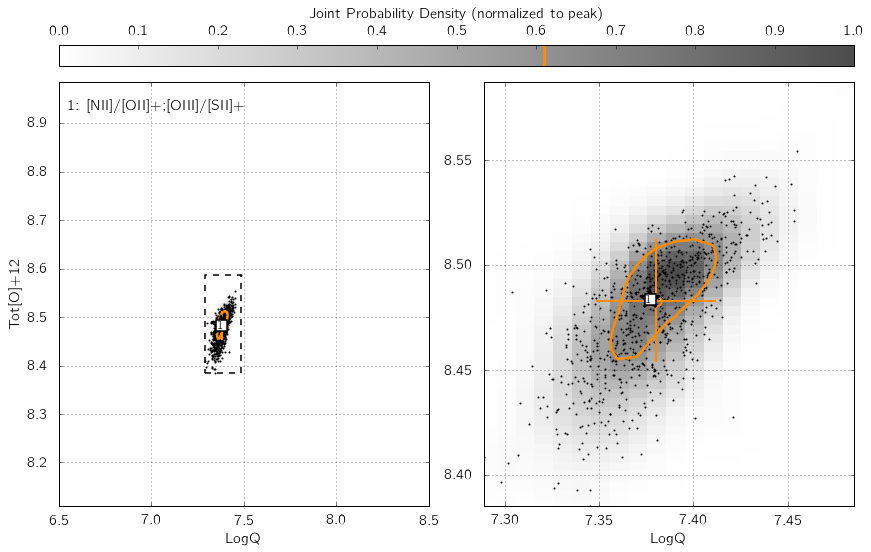

In [4]:
my_srs = 800
pyqz.get_global_qz(np.array([[ 1.00e+00, 5.00e-02, 2.38e+00, 1.19e-01, 5.07e+00, 2.53e-01, 
                               5.67e-01, 2.84e-02, 5.11e-01, 2.55e-02, 2.88e+00, 1.44e-01]]),
                   ['Hb','stdHb','[OIII]','std[OIII]','[OII]+','std[OII]+',
                    '[NII]','std[NII]','[SII]+','std[SII]+','Ha','stdHa'],
                   ['[NII]/[OII]+;[OIII]/[SII]+'], 
                   ids = ['NGC_5678'],
                   srs = my_srs,
                   KDE_pickle_loc = './example_plots/',
                   KDE_method = 'multiv',
                   KDE_qz_sampling=201j,
                   struct='pp',
                   sampling=1)

# And use pyqz_plots.plot_global_qz() to display the result
import glob
fn = glob.glob('./example_plots/*NGC_5678*.pkl')

pyqz_plots.plot_global_qz(fn[0], show_plots = True, save_loc = './example_plots', do_all_diags = False)


### Parameter 2: ``KDE_method``

This keyword specifies the Kernel Density Estimation routine used to reconstruct the individual and joint probability density functions in the {``LogQ`` vs. ``Tot[O]+12``} plane. It can be either ``gauss`` to use ``gaussian_kde`` from the ``scipy.stats`` module, or ``multiv`` to use ``KDEMultivariate`` from the ``statsmodels`` package. 

The former option is 10-100x faster, but usually results in less accurate results if different diagnostic grids disagree. The underlying reason is that with ``gaussian_kde``, the kernel bandwidth cannot be explicitly set individually for the ``LogQ`` and ``Tot[O]+12`` directions, so that the function tends to over-smooth the distribution. ``KDEMultivariate`` should be preferred as the bandwidth of the kernel is set individually for both the ``LogQ`` and ``Tot[O]+12`` directions using Scott's rule, scaled by the standard deviation of the distribution along these directions. 

In the example below, we insert some error in the [OII] line flux - thereby creating a mismatch between the different line ratio space estimates. Switch ``my_method`` from ``'gauss'`` to ``'multiv'``, and watch how the joint PDF (shown as shades of gray) traces the distribution of black dots in a significantly worse/better manner.

 
--> Received 1 spectrum ...
--> Dealing with them one at a time ... be patient now !
    (no status update until I am done ...)
 
All done in 0:00:00.548880


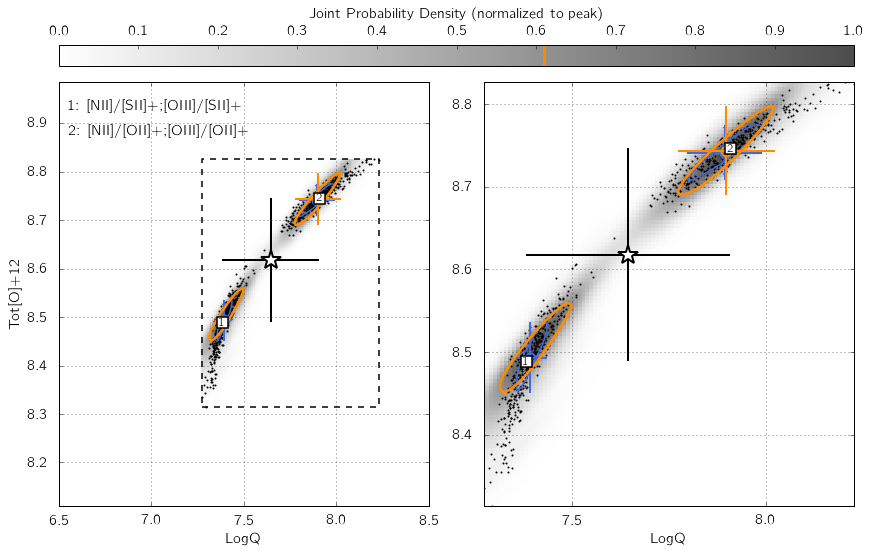

In [11]:
my_method = 'gauss'
pyqz.get_global_qz(np.array([[ 1.00e+00, 5.00e-02, 2.38e+00, 1.19e-01, 2.07e+00, 2.53e-01, 
                               5.67e-01, 2.84e-02, 5.11e-01, 2.55e-02, 2.88e+00, 1.44e-01]]),
                   ['Hb','stdHb','[OIII]','std[OIII]','[OII]+','std[OII]+',
                    '[NII]','std[NII]','[SII]+','std[SII]+','Ha','stdHa'],
                   ['[NII]/[SII]+;[OIII]/[SII]+','[NII]/[OII]+;[OIII]/[OII]+'], 
                   ids = ['NGC_09'],
                   srs = 400,
                   KDE_pickle_loc = './example_plots/',
                   KDE_method = my_method,
                   KDE_qz_sampling=201j,
                   struct='pp',
                   sampling=1)

# And use pyqz_plots.plot_global_qz() to display the result
import glob
fn = glob.glob('./example_plots/*NGC_09*%s*.pkl' % my_method)

pyqz_plots.plot_global_qz(fn[0], show_plots = True, save_loc = './example_plots', do_all_diags = False)


### Parameter 3: ``KDE_qz_sampling``

This sets the sampling of the {``LogQ`` vs. ``Tot[O]+12``} plane, when reconstructing the individual and global PDFs. Set to ``101j`` by default (i.e. a grid with 101$\cdot$101 = 10201 sampling nodes), datasets with small errors ($<$5%) could benefit from using twice this resolution for better results (i.e. ``KDE_qz_sampling=201j``). Resulting in a longer processing time of course. In the following example, the influence of ``KDE_qz_sampling`` can be seen in the size of the resolution elements of the joint PDF map, as well as the smoothness of the (orange) contour at 0.61%.

 
--> Received 1 spectrum ...
--> Dealing with them one at a time ... be patient now !
    (no status update until I am done ...)
 
All done in 0:00:00.104960


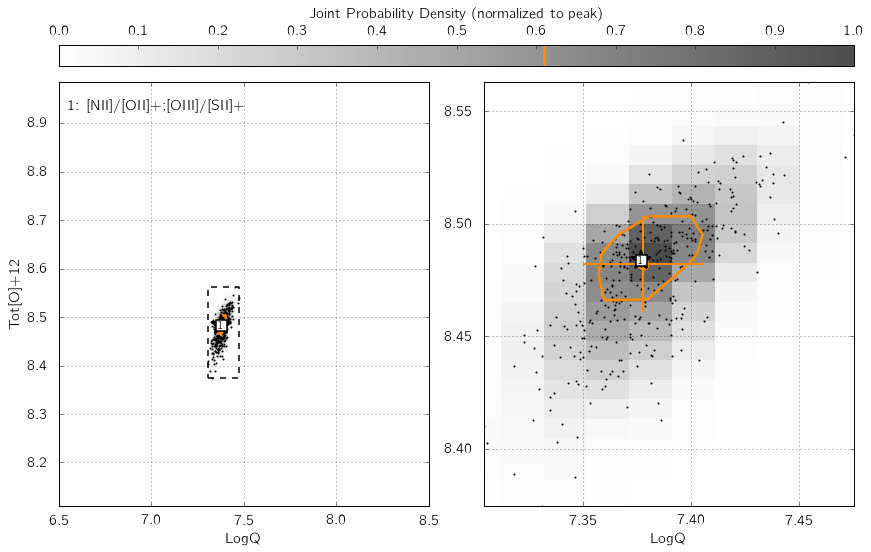

In [16]:
my_qz_sampling = 101j
pyqz.get_global_qz(np.array([[ 1.00e+00, 5.00e-02, 2.38e+00, 1.19e-01, 5.07e+00, 2.53e-01, 
                               5.67e-01, 2.84e-02, 5.11e-01, 2.55e-02, 2.88e+00, 1.44e-01]]),
                   ['Hb','stdHb','[OIII]','std[OIII]','[OII]+','std[OII]+',
                    '[NII]','std[NII]','[SII]+','std[SII]+','Ha','stdHa'],
                   ['[NII]/[OII]+;[OIII]/[SII]+'], 
                   ids = ['NGC_00'],
                   srs = 400,
                   KDE_pickle_loc = './example_plots/',
                   KDE_method = 'multiv',
                   KDE_qz_sampling=my_qz_sampling,
                   struct='pp',
                   sampling=1)

# And use pyqz_plots.plot_global_qz() to display the result
import glob
fn = glob.glob('./example_plots/*NGC_00*.pkl')

pyqz_plots.plot_global_qz(fn[0], show_plots = True, save_loc = './example_plots/', do_all_diags = False)


### The other parameters

Most of the other parameters ought to be straightforward to understand (e.g. ``verbose``).  To use the maximum number of cpus available when running pyqz, set ``nproc = -1``. 

Check the page <i>the functions of pyqz</i> in the docs for more details.